# Lasers Coding Exercise #1 Solutions

## 1.1 Gaussian vs Lorentzian
In this part of the exercise you will compare Gaussian and Lorentzian functions which crop up a frequently in laser physics e.g. as laser line profiles (spectral distributions), laser beam profiles (spatial distributions), and laser pulse shapes (temporal distributions).

Here we consider line shapes which relates to the line broadening part of the course.


**a)**	Write a function `get_width(x, y)` that determines the width of a single-peaked distribution defined by x points `x` and y points `y`. 

You could make `get_width` return the width at a given fraction of the peak height passed in a keyword argument, which defaults to a FWHM width. 

Test get_width with the distribution  `f(x) = exp(-4*ln(2)*x**2)` – it should return a FWHM of 1.

In [4]:
import numpy as np

In [1]:
def get_width(x, y, fraction=0.5):
    """ 
    Returns the width of a single peaked distribution y sampled on x.
    The width is calculated between the x points where y has dropped to fraction*peak_y_value.
    eg. fraction = 0.5 --> returns FWHM
    eg. fraction = 1/e --> returns 1/e FULL WIDTH
    """
    d = y - (np.max(y)*fraction) 
    indexes = np.where(d > 0)[0] 
    return abs(x[indexes[-1]] - x[indexes[0]])

In [2]:
def f(x):
    """ A gaussian test function with FWHM = 1 """
    return np.exp(-4*np.log(2)*x**2)

In [5]:
x = np.linspace(-2, 2, 1000) # I'm using a lot of samples here to make get_width more accurate 

In [6]:
y = f(x)

In [7]:
import matplotlib.pyplot as plt

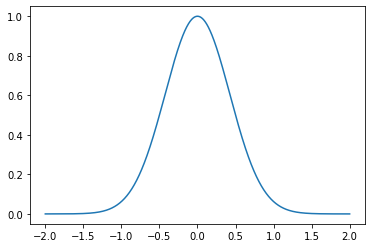

In [8]:
plt.plot(x,y)
plt.show()

In [9]:
get_width(x,y)

0.9969969969969972

Was your solution more accurate?

Aside: Let's use `get_width` to calculate the 1/e width of a function.

In [10]:
def f2(x):
    """ 1/e full width of this function should be 2 """
    return np.exp(-x**2)

In [11]:
y2 = f2(x)

In [12]:
get_width(x, y2, fraction=1/np.e)

1.9979979979979978

This works too.

**b)**	Write two functions, `gaussian(w,…)` and `lorentzian(w,…)` using the equations for these distributions given in the lecture notes, where the first positional argument `w` is the angular frequency $\omega$, and other parameters are passed-in as subsequent positional arguments.

In [21]:
def gaussian(w, *args):
    """ Implements a unit-area gaussian profile sampled on w. """
    w0, dw = args # centre frequency, FWHM
    return (2 * np.sqrt(np.log(2) / np.pi) / dw ) * np. exp(- 4 * np.log(2) * (w - w0)**2 / dw**2)

In [22]:
def lorentzian(w, *args):
    """ Implement a unit-area lorentzian function sampled on w. """
    w0, dw = args # centre frequency, FWHM
    return (2 / np.pi / dw) * dw**2 / (dw**2 + 4 * (w - w0)**2) 


**c)**	Create a gaussian laser profile centred on $\omega_0$=2.36 rad/fs (fs = femtosecond) with a width of $\Delta\omega$=0.5 rad/fs and also make a lorentzian profile with the same parameters. Compare these profiles by plotting them on the same axes, first on a linear scale and then on a log vertical scale. A log scale helps you compare the “wings” of the distributions. Record your observations.

Note that $\omega_0$=2.36 rad/fs corresponds to $\lambda_0$ = 800 nm which is the centre wavelengh of titanium-doped-saphire lasers.

In [23]:
w0 = 2.36 # rad/fs
dw = 0.5 # rad/fs

In [24]:
w = np.linspace(0, 5, 1000) # angular freq axis in rad/fs

In [25]:
y_gauss = gaussian(w, w0, dw)

In [26]:
y_lorentz = lorentzian(w, w0, dw)

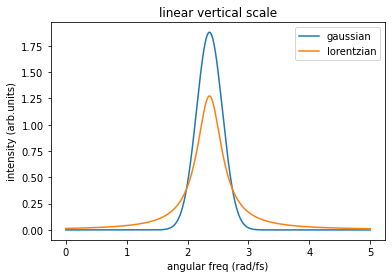

In [27]:
plt.plot(w,y_gauss, label="gaussian")
plt.plot(w,y_lorentz, label="lorentzian")
plt.xlabel('angular freq (rad/fs)')
plt.ylabel('intensity (arb.units)')
plt.title("linear vertical scale")
plt.legend()
plt.show()

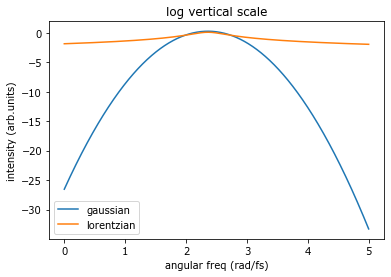

In [19]:
# The best way to make a log plot is to configure plt to have a log yscale like this:
# plt.yscale("log")
# But for some unknown reason this causes my Jupyter notebook to raise a weird font error.
# So instead I'm taking the log10 of the y-values...
plt.plot(w, np.log10(y_gauss), label="gaussian")
plt.plot(w, np.log10(y_lorentz), label="lorentzian")
plt.xlabel('angular freq (rad/fs)')
plt.ylabel('intensity (arb.units)')
plt.title("log vertical scale")
plt.legend()
plt.show()

### Some observations
The gaussian drops to zero faster than the lorentzian. The broader wings of the lorentzian is very obvious on the log scale.

The peak height of the gaussian is greater than the lorentzian since both profiles are defined as having unit area.

**d)**	Using your `get_width` function, convince yourself that the distributions have the expected widths.

In [28]:
get_width(w, y_gauss) 

0.4954954954954953

In [29]:
get_width(w, y_lorentz)

0.4954954954954953

Use f-strings to make a nice output with 2 signficant figures.

In [30]:
print(f"width of gaussian = {get_width(w, y_gauss):.2f} rad/fs")

width of gaussian = 0.50 rad/fs


In [31]:
print(f"width of lorentzian = {get_width(w, y_lorentz):.2f} rad/fs")

width of lorentzian = 0.50 rad/fs


Widths as expected, given accuracy limitations of `get_width`

### Extension

**e)**	Show that the areas under the distributions have the expected values. 

i) Start by integrating the guassian and lorentzian functions directly using `quad` integration from `scipy.integrate` (you can set an infinite integration range using `np.inf`). 

ii) Then obtain the areas of the sampled data using `simpson` from `scipy.integrate`.

#### i) Integrating the functions using `quad` over range  (-$\infty$,$\infty$) 

In [32]:
from scipy.integrate import quad

BTW: To get help for any imported module, just use `help`:
    
`help(quad)`

I'm not doing it in these exercises since the docstrings are rather long!

In [33]:
quad(gaussian, -np.inf, np.inf, args=(w0,dw)) # returns tuple: area, error

(1.0000000000000044, 1.4788960345451828e-10)

In [34]:
quad(lorentzian, -np.inf, np.inf, args=(w0,dw))

(1.0, 1.0561402256672172e-10)

Unit areas, as expected :-)

#### ii) Integrating the sampled data using `simpson`.

In [58]:
from scipy.integrate import simps
#import scipy.integrate as sp
#from scipy import integrate
#from scipy.integrate import simpson

In [59]:
simps(y_gauss, w) # note y values first!

1.0

In [60]:
simps(y_lorentz, w) # note y values first!

0.936352657649891

Note that since the lorentzian falls to zero more slowly, we would need to use a larger integration range to ge a more accurate integral. 

But moving on....



## 1.2 Voigt profile
In this part, you will simulate the combination of homogeneous and inhomogeneous broadening mechanisms and compare the result to the Voigt profile formula.


**a)**	Write a function that returns the width of a Voigt profile, as given by the empirical formula in the lecture notes.

In [61]:
def voigt_fwhm_empirical(dw_l, dw_g):
    """ 
    Returns FWHM of Voigt profile.
    dw_l: lorentzian FWHM
    dw_g: gaussian FWHM
    """
    return 0.5*dw_l + np.sqrt(0.2*dw_l**2 + dw_g**2)

**b)**	Calculate the Voigt profile as the convolution of the previous gaussian and Lorentzian profiles using `convolve` from `scipy.signal`. Use the option `mode='same'` with `convolve` to ensure the convolution is the same size as the inputs. Plot all three profiles on the same axes and record your observations. Don't worry if the peak of the convolution is not aligned with the peaks of the other pulses - this is a quirk of the way convolve returns the data. In reality, the peaks should coincide.

In [62]:
from scipy.signal import convolve

In [63]:
y_voigt = convolve(y_gauss, y_lorentz, mode="same")

In [64]:
# normalise
y_voigt /= np.max(y_voigt)


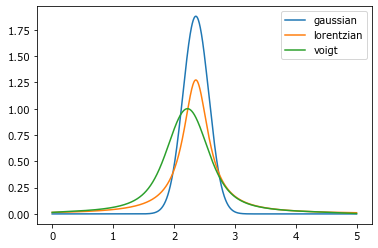

In [34]:
plt.plot(w, y_gauss, label = 'gaussian')
plt.plot(w, y_lorentz, label = 'lorentzian')
plt.plot(w, y_voigt, label='voigt')
plt.legend()
plt.show()

### Some observations
The Voigt profile is wider than either of the component profiles.

If one of the component profiles is much narrower than the other, the width of the convolution will be just a bit bigger than the width of the wider profile. 

You can test this by calculating some more convolutions - this is also evident from the empirical formula.

**c)** Use your get_width function to check the empirial formula for the FWHM of the Voigt profile.

In [65]:
empirical_fwhm = voigt_fwhm_empirical(dw, dw) # recall that dw was the width of both the gaussian and lorentzian profiles

In [66]:
actual_fwhm = get_width(w, y_voigt)

In [67]:
# This is a nice f-string trick for printing variable names and their values by puting an equal sign after the var name.
# You might might need a recent version of python for this

print(f"{empirical_fwhm=:.3f} rad/fs, {actual_fwhm=:.3f} rad/fs") 

empirical_fwhm=0.798 rad/fs, actual_fwhm=0.811 rad/fs


In [68]:
print(f"percentage error = {100*(empirical_fwhm-actual_fwhm)/actual_fwhm:.2f}%")

percentage error = -1.61%


Not bad!

### Extension

**d)**	Calculate a large number of convolutions (~100) of Gaussians and Lorentzians distributions of random widths in the range 0.1 - 2 rad/fs. Carry out a linear regression analysis of the Voigt empirical FWHMs vs the actual convolution widths using the `linregress` module from `scipy.stats` to test the validity of the empirical formula. Record your observations.

In [69]:
from random import uniform

In [70]:
# Generate some random widths
dw_l_vals = [uniform(0.1, 2) for _ in range(100)]
dw_g_vals = [uniform(0.1, 2) for _ in range(100)]


In [71]:
# calculate actual (from convolution width) and empirical-formula widths for the Voigt
actual = []
formula = []
for dw_l, dw_g in zip(dw_l_vals, dw_g_vals):
    y_lorentz = lorentzian(w, w0, dw_l)
    y_gauss = gaussian(w, w0, dw_g)
    y_voigt = convolve(y_gauss, y_lorentz, mode='same')
    actual.append(get_width(w, y_voigt))
    formula.append(voigt_fwhm_empirical(dw_l, dw_g))

Convert data to `np arrays`

In [72]:
actual = np.array(actual)
formula = np.array(formula)

Linear regression:

In [73]:
from scipy.stats import linregress
res = linregress(actual, formula)
r = res.rvalue
slope = res.slope
intercept = res.intercept
print(f"R-squared: {r**2:.3f}")
print(f"slope of linear fit: {slope:.3f}")
print(f"intercept of linear fit: {intercept:.3f}")


R-squared: 0.999
slope of linear fit: 0.992
intercept of linear fit: -0.021


Plot scatter plot of data and linear fit

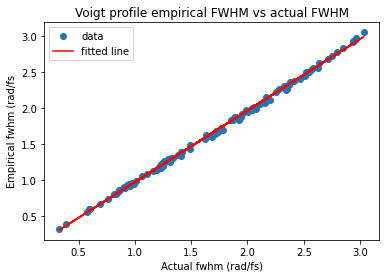

In [75]:
plt.title('Voigt profile empirical FWHM vs actual FWHM')
plt.plot(actual, formula, 'o', label='data')
plt.plot(actual, actual*slope + intercept, 'r', label='fitted line')
plt.xlabel('Actual fwhm (rad/fs)')
plt.ylabel('Empirical fwhm (rad/fs')
plt.legend()
plt.show()

The empirical formula appears to be pretty darn good!